<a href="https://colab.research.google.com/github/ojuyeon88/Multi-Latent-Space/blob/main/Auto_encoder_developed_idea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto-encoder(Mnist)

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# 1. MNIST 데이터셋 로드
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지 크기를 (28, 28)에서 (28, 28, 1)로 확장
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. 이미지에 노이즈 추가
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 4. 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 5. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=31,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 6. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 7. 결과 이미지 저장 폴더 생성
input_dir = 'input-image'
output_dir = 'auto-image'
os.makedirs(input_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# 8. 입력 및 출력 이미지 저장
n = 10  # 저장할 이미지 개수
for i in range(n):
    # input 이미지 저장
    input_image_path = os.path.join(input_dir, f'input-{i}.png')
    plt.imsave(input_image_path, x_test_noisy[i].reshape(28, 28), cmap='gray')

    # output 이미지 저장
    output_image_path = os.path.join(output_dir, f'auto-{i}.png')
    plt.imsave(output_image_path, denoised_imgs[i].reshape(28, 28), cmap='gray')

print("이미지 저장 완료!")


Epoch 1/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3291 - val_loss: 0.1658
Epoch 2/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1572 - val_loss: 0.1356
Epoch 3/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1335 - val_loss: 0.1233
Epoch 4/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1224 - val_loss: 0.1167
Epoch 5/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1168 - val_loss: 0.1124
Epoch 6/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1127 - val_loss: 0.1096
Epoch 7/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1100 - val_loss: 0.1067
Epoch 8/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1066 - val_loss: 0.1045
Epoch 9/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1043 - val_loss: 0.1022
Epoch 10/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1029 - val_loss: 0.1011
Epoch 11/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1017 - val_loss: 0.1001
Epoch 12/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.3201 - val_loss: 0.1602
Epoch 2/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1517 - val_loss: 0.1325
Epoch 3/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1297 - val_loss: 0.1194
Epoch 4/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1191 - val_loss: 0.1131
Epoch 5/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1132 - val_loss: 0.1093
Epoch 6/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1094 - val_loss: 0.1063
Epoch 7/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1069 - val_loss: 0.1041
Epoch 8/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1046 - val_loss: 0.1025
Epoch 9/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1031 - val_loss: 0.1011
Epoch 10/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1018 - val_loss: 0.0999
Epoch 11/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1007 - val_loss: 0.0988


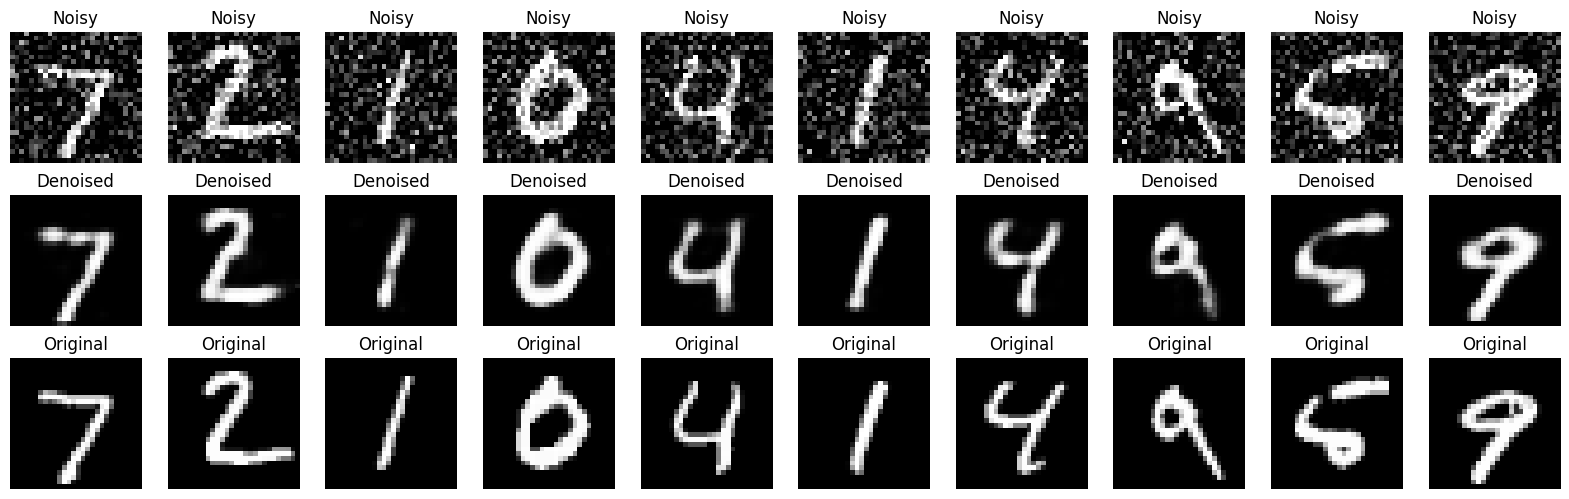

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# 1. MNIST 데이터셋 로드
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지 크기를 (28, 28)에서 (28, 28, 1)로 확장
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. 이미지에 노이즈 추가
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 4. 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 5. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=31,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 6. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 7. 결과 이미지 저장 폴더 생성
input_dir = 'input-image'
output_dir = 'auto-image'
os.makedirs(input_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# 8. 입력 및 출력 이미지 저장
n = 10  # 저장할 이미지 개수
for i in range(n):
    # input 이미지 저장
    input_image_path = os.path.join(input_dir, f'input-{i}.png')
    plt.imsave(input_image_path, x_test_noisy[i].reshape(28, 28), cmap='gray')

    # output 이미지 저장
    output_image_path = os.path.join(output_dir, f'auto-{i}.png')
    plt.imsave(output_image_path, denoised_imgs[i].reshape(28, 28), cmap='gray')

print("이미지 저장 완료!")

# 9. 저장된 입력 및 출력 이미지 시각화
plt.figure(figsize=(20, 6))
for i in range(n):
    # 저장된 input 이미지 불러오기 및 시각화
    input_image_path = os.path.join(input_dir, f'input-{i}.png')
    input_image = plt.imread(input_image_path)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(input_image, cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 output 이미지 불러오기 및 시각화
    output_image_path = os.path.join(output_dir, f'auto-{i}.png')
    output_image = plt.imread(output_image_path)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(output_image, cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 시각화
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()


### [Auto-encoder] Denoised img 결과 PSNR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
import os

# 폴더 생성
if not os.path.exists('output_images'):
    os.makedirs('output_images')

# 1. 이미지 저장
n = 10  # 저장할 이미지 개수
for i in range(n):
    # 원본 이미지 (참고용)
    plt.imsave(f'output_images/original_img_{i}.png', x_test[i].reshape(28, 28), cmap='gray')

    # 복원된 이미지
    plt.imsave(f'output_images/denoised_img_{i}.png', denoised_imgs[i].reshape(28, 28), cmap='gray')

print("Original and denoised images saved successfully.")

# 2. PSNR 계산
psnr_values = []
for i in range(len(x_test)):
    psnr_value = psnr(x_test[i].reshape(28, 28), denoised_imgs[i].reshape(28, 28))
    psnr_values.append(psnr_value)

# 평균 PSNR 출력
average_psnr = np.mean(psnr_values)
print(f"Average PSNR between original and denoised images: {average_psnr:.2f} dB")

# 선택한 이미지의 PSNR 시각화
print("PSNR values for selected images:")
for i in range(n):
    print(f"Image {i+1}: PSNR = {psnr_values[i]:.2f} dB")


Original and denoised images saved successfully.
Average PSNR between original and denoised images: 17.71 dB
PSNR values for selected images:
Image 1: PSNR = 18.61 dB
Image 2: PSNR = 15.61 dB
Image 3: PSNR = 22.80 dB
Image 4: PSNR = 17.19 dB
Image 5: PSNR = 18.27 dB
Image 6: PSNR = 23.74 dB
Image 7: PSNR = 15.27 dB
Image 8: PSNR = 14.82 dB
Image 9: PSNR = 15.86 dB
Image 10: PSNR = 18.25 dB


#Autoencoder(cifar-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 164ms/step - loss: 0.6615 - val_loss: 0.6233
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - loss: 0.6194 - val_loss: 0.6110
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 31s 159ms/step - loss: 0.6043 - val_loss: 0.5988
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 171ms/step - loss: 0.5975 - val_loss: 0.5965
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 158ms/step - loss: 0.5937 - val_loss: 0.5926
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 163ms/step - loss: 0.5915 - val_loss: 0.5915
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 160ms/step - loss: 0.5894 - val_loss: 0.5898
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 44s 175ms/step - loss: 0.5897 - val_loss: 0.5896
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 172ms/step - loss: 0.5877 - val_loss: 0.5887
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 162ms/step - loss: 0.5859 - val_loss: 0.5879
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


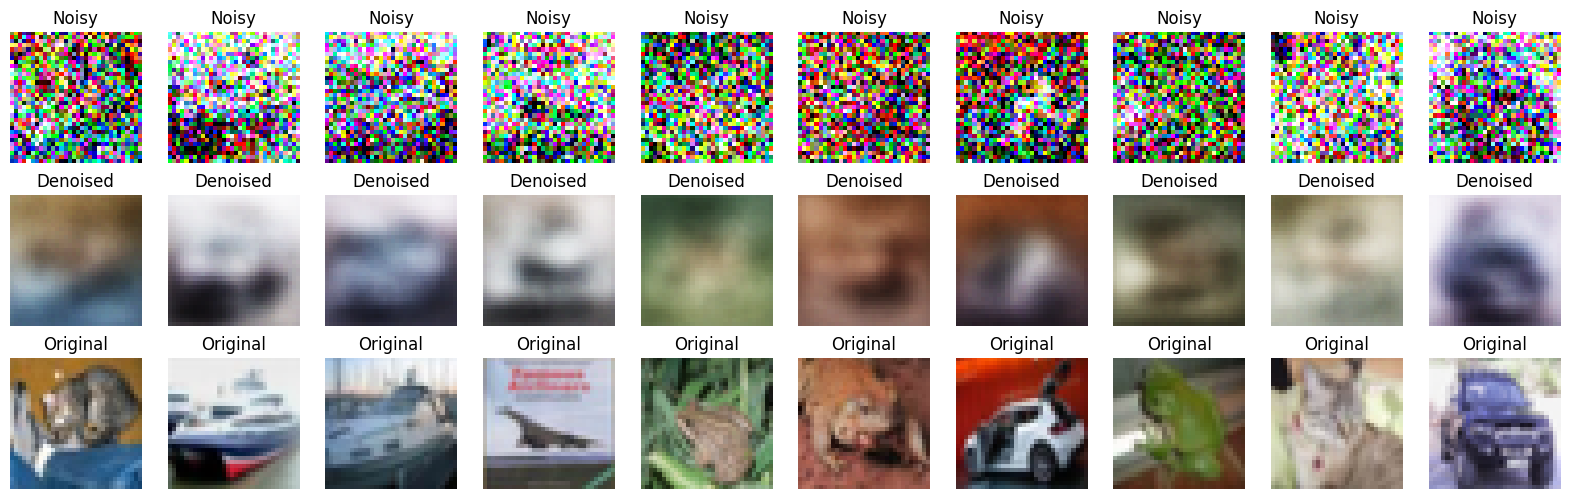

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지에 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)
encoded = Dense(256, activation='relu')(x)

# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 원본 이미지 (노이즈 추가된)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 (참고용)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()



# Multi Latent Space (Mnist)

latent space 2개의 경우


*   다중 잠재 공간 설정: latent_space_1과 latent_space_2 레이어가 각기 다른 특징을 학습할 수 있는 별도의 잠재 공간
*   잠재 공간 결합: Concatenate 레이어를 통해 두 잠재 공간을 결합한 후 디코더로 전달
*   디코더: 결합된 잠재 공간으로부터 입력 이미지를 복원





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# 1. MNIST 데이터셋 로드
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지 크기를 (28, 28)에서 (28, 28, 1)로 확장
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. 이미지에 노이즈 추가
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 4. 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 5. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=31,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 6. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 7. 결과 이미지 저장 폴더 생성
x_test_dir = 'x_test_images'
denoised_dir = 'denoised_images'
os.makedirs(x_test_dir, exist_ok=True)
os.makedirs(denoised_dir, exist_ok=True)

# 8. x_test와 denoised_imgs 이미지 저장
n = 10  # 저장할 이미지 개수
for i in range(n):
    # x_test 이미지 저장
    x_test_image_path = os.path.join(x_test_dir, f'x_test-{i}.png')
    plt.imsave(x_test_image_path, x_test[i].reshape(28, 28), cmap='gray')

    # denoised_imgs 이미지 저장
    denoised_image_path = os.path.join(denoised_dir, f'denoised-{i}.png')
    plt.imsave(denoised_image_path, denoised_imgs[i].reshape(28, 28), cmap='gray')

print("x_test와 denoised_imgs 이미지 저장 완료!")


Epoch 1/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.3263 - val_loss: 0.1619
Epoch 2/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1547 - val_loss: 0.1355
Epoch 3/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1334 - val_loss: 0.1236
Epoch 4/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1229 - val_loss: 0.1168
Epoch 5/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1169 - val_loss: 0.1123
Epoch 6/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.1128 - val_loss: 0.1089
Epoch 7/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1093 - val_loss: 0.1064
Epoch 8/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1067 - val_loss: 0.1043
Epoch 9/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1049 - val_loss: 0.1026
Epoch 10/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1031 - val_loss: 0.1009
Epoch 11/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1015 - val_loss: 0.0998
Epoch 12/31
235/235 ━━━━━━━━━━━━━━━━━━━━ 

[latent space - 2] Denoise img 결과 PSNR

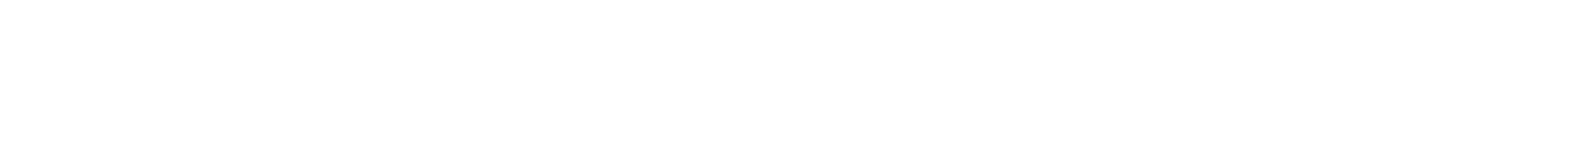

Average PSNR between original and denoised images: 18.35 dB
PSNR values for selected images:
Image 1: PSNR = 20.67 dB
Image 2: PSNR = 16.78 dB
Image 3: PSNR = 21.97 dB
Image 4: PSNR = 18.49 dB
Image 5: PSNR = 18.95 dB
Image 6: PSNR = 26.81 dB
Image 7: PSNR = 17.25 dB
Image 8: PSNR = 16.08 dB
Image 9: PSNR = 16.08 dB
Image 10: PSNR = 18.38 dB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
import os

# 저장 폴더 생성
if not os.path.exists('output_images'):
    os.makedirs('output_images')

# 1. 시각화 및 이미지 저장
n = 10  # 저장할 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):

    # 복원된 이미지 저장 및 시각화
    ax = plt.subplot(3, n, i + 1 + n)
    #plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    #plt.title("Denoised")
    plt.axis('off')
    plt.imsave(f'output_images/denoised_latent_2_img_{i}.png', denoised_imgs[i].reshape(28, 28), cmap='gray')

plt.show()
#print("Images saved successfully.")

# 2. PSNR 계산 및 출력
psnr_values = []
for i in range(len(x_test)):
    psnr_value = psnr(x_test[i].reshape(28, 28), denoised_imgs[i].reshape(28, 28))
    psnr_values.append(psnr_value)

# 평균 PSNR 출력
average_psnr = np.mean(psnr_values)
print(f"Average PSNR between original and denoised images: {average_psnr:.2f} dB")

# 선택한 이미지의 PSNR 시각화
print("PSNR values for selected images:")
for i in range(n):
    print(f"Image {i+1}: PSNR = {psnr_values[i]:.2f} dB")


latent space 3개의 경우

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3237 - val_loss: 0.1751
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1673 - val_loss: 0.1495
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1468 - val_loss: 0.1371
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1363 - val_loss: 0.1307
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1305 - val_loss: 0.1274
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1268 - val_loss: 0.1250
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1241 - val_loss: 0.1224
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1222 - val_loss: 0.1205
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1201 - val_loss: 0.1198
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1185 - val_loss: 0.1181
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1172 - val_loss: 0.1167
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 

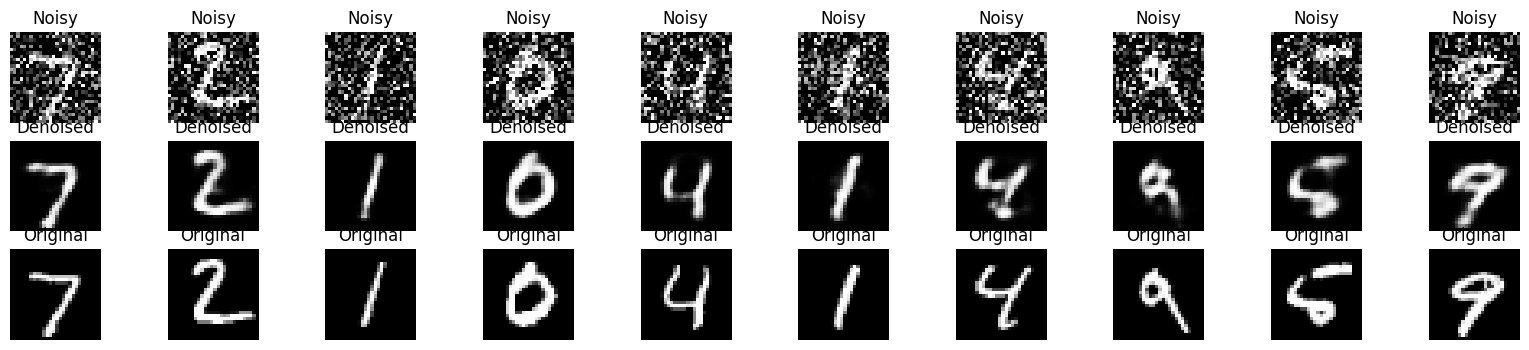

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# 1. MNIST 데이터셋 로드
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지 크기를 (28, 28)에서 (28, 28, 1)로 확장
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. 이미지에 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 4. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)

# 다중 잠재 공간 정의 (3개의 잠재 공간)
latent_1 = Dense(32, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(32, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(32, activation='relu', name='latent_space_3')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3])

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 5. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 6. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 7. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지 (노이즈 추가된)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 (참고용)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()


[latent space - 3] Denoise img 결과 & 저장

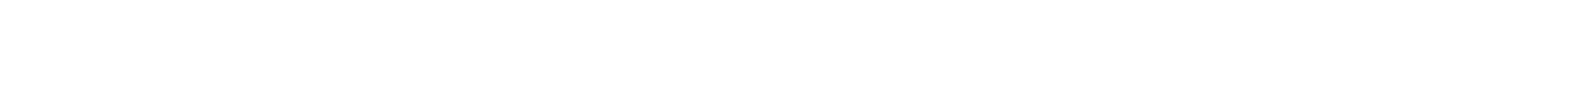

Images saved successfully.
Average PSNR between original and denoised images: 18.54 dB
PSNR values for selected images:
Image 1: PSNR = 20.25 dB
Image 2: PSNR = 18.99 dB
Image 3: PSNR = 22.00 dB
Image 4: PSNR = 19.55 dB
Image 5: PSNR = 18.58 dB
Image 6: PSNR = 23.11 dB
Image 7: PSNR = 16.72 dB
Image 8: PSNR = 17.04 dB
Image 9: PSNR = 16.58 dB
Image 10: PSNR = 18.24 dB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
import os

# 저장 폴더 생성
if not os.path.exists('output_images'):
    os.makedirs('output_images')

# 1. 시각화 및 이미지 저장
n = 10  # 저장할 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    # 복원된 이미지 저장 및 시각화
    ax = plt.subplot(3, n, i + 1 + n)
    plt.axis('off')
    plt.imsave(f'output_images/denoised_latent_3_img_{i}.png', denoised_imgs[i].reshape(28, 28), cmap='gray')

plt.show()
print("Images saved successfully.")

# 2. PSNR 계산 및 출력
psnr_values = []
for i in range(len(x_test)):
    psnr_value = psnr(x_test[i].reshape(28, 28), denoised_imgs[i].reshape(28, 28))
    psnr_values.append(psnr_value)

# 평균 PSNR 출력
average_psnr = np.mean(psnr_values)
print(f"Average PSNR between original and denoised images: {average_psnr:.2f} dB")

# 선택한 이미지의 PSNR 시각화
print("PSNR values for selected images:")
for i in range(n):
    print(f"Image {i+1}: PSNR = {psnr_values[i]:.2f} dB")


latent 5

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.3156 - val_loss: 0.1749
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1663 - val_loss: 0.1456
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1429 - val_loss: 0.1336
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1328 - val_loss: 0.1280
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1275 - val_loss: 0.1243
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.1238 - val_loss: 0.1208
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1207 - val_loss: 0.1192
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1184 - val_loss: 0.1172
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1166 - val_loss: 0.1157
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1154 - val_loss: 0.1145
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1141 - val_los

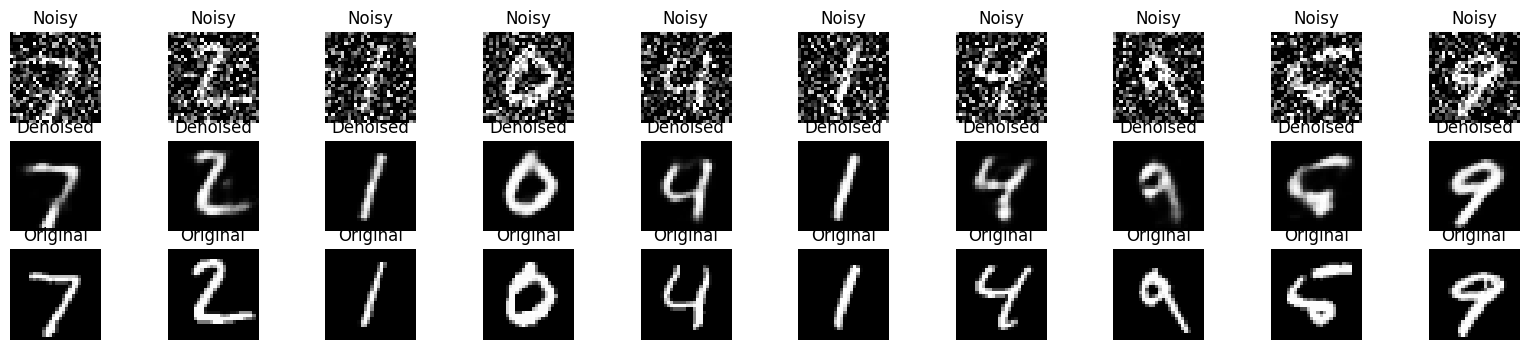

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# 1. MNIST 데이터셋 로드
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지 크기를 (28, 28)에서 (28, 28, 1)로 확장
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. 이미지에 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 4. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)

# 다중 잠재 공간 정의 (여기서는 2개의 잠재 공간을 사용)
latent_1 = Dense(32, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(32, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(32, activation='relu', name='latent_space_3')(x)
latent_4 = Dense(32, activation='relu', name='latent_space_4')(x)
latent_5 = Dense(32, activation='relu', name='latent_space_5')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3, latent_4, latent_5])

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 5. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 6. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 7. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지 (노이즈 추가된)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 (참고용)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()


In [ ]:
# prompt: !pip install -U tensorflow keras

```python
!pip install -U tensorflow keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from skimage.metrics import peak_signal_noise_ratio as psnr
import os
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
# # Auto-encoder(Mnist)
# 요거는 해원이 코드를 참고햇습니다..
!pip install tensorflow

# 1. MNIST 데이터셋 로드
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지 크기를 (28, 28)에서 (28, 28, 1)로 확장
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. 이미지에 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 4. 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 5. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 6. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 7. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지 (노이즈 추가된)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 (참고용)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()
# ### [Auto-encoder] Denoised img 결과 PSNR

# 폴더 생성
if not os.path.exists('output_images'):
    os.makedirs('output_images')

# 1. 이미지 저장
n = 10  # 저장할 이미지 개수
for i in range(n):
    # 원본 이미지 (참고용)
    plt.imsave(f'output_images/original_img_{i}.png', x_test[i].reshape(28, 28), cmap='gray')

    # 복원된 이미지
    plt.imsave(f'output_images/denoised_img_{i}.png', denoised_imgs[i].reshape(28, 28), cmap='gray')

print("Original and denoised images saved successfully.")

# 2. PSNR 계산
psnr_values = []
for i in range(len(x_test)):
    psnr_value = psnr(x_test[i].reshape(28, 28), denoised_imgs[i].reshape(28, 28))
    psnr_values.append(psnr_value)

# 평균 PSNR 출력
average_psnr = np.mean(psnr_values)
print(f"Average PSNR between original and denoised images: {average_psnr:.2f} dB")

# 선택한 이미지의 PSNR 시각화
print("PSNR values for selected images:")
for i in range(n):
    print(f"Image {i+1}: PSNR = {psnr_values[i]:.2f} dB")

# #Autoencoder(cifar-10)

# 1. CIFAR-10 데이터셋 로드
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지에 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)
encoded = Dense(256, activation='relu')(x)

# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 원본 이미지 (노이즈 추가된)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 (참고용)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [ ]:
!pip install tensorflow --no-cache-dir --upgrade


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

# 프로젝트 코드

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - loss: 0.0774 - val_loss: 0.0215
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - loss: 0.0201 - val_loss: 0.0157
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - loss: 0.0154 - val_loss: 0.0137
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - loss: 0.0134 - val_loss: 0.0123
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - loss: 0.0122 - val_loss: 0.0113
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - loss: 0.0114 - val_loss: 0.0107
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - loss: 0.0108 - val_loss: 0.0104
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 259s 999ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - loss: 0.0099 - val_loss: 0.0097
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - loss: 0.0095 - val_loss: 0.0093
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - loss: 0.0093 - val_

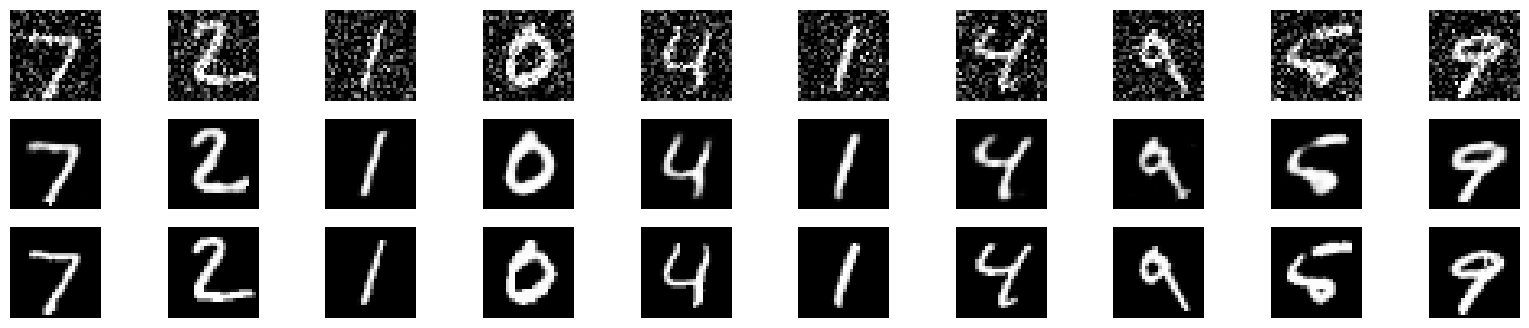

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

# 1. MNIST 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 2. 노이즈 추가
noise_factor = 0.3
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(size=x_test.shape), 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# 다중 잠재 공간 정의
latent_1 = Dense(32, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(32, activation='relu', name='latent_space_2')(x)
encoded = Concatenate()([latent_1, latent_2])

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 4. 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[early_stopping])

# 5. 결과 시각화
denoised_imgs = autoencoder.predict(x_test_noisy)
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 0.0787 - val_loss: 0.0233
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0217 - val_loss: 0.0172
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0169 - val_loss: 0.0149
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0146 - val_loss: 0.0137
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0135 - val_loss: 0.0125
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0126 - val_loss: 0.0119
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0102 - val_lo

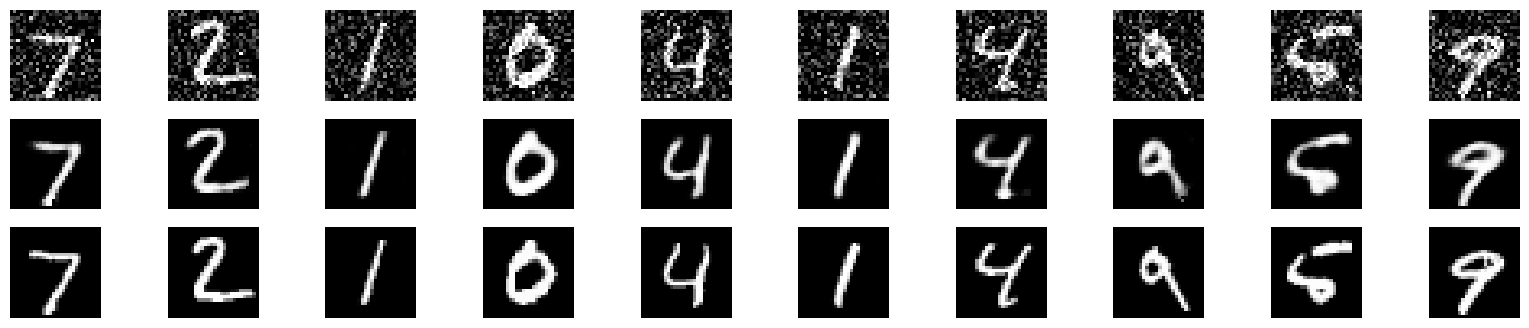

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

# 1. MNIST 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 2. 노이즈 추가
noise_factor = 0.3
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(size=x_test.shape), 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# 다중 잠재 공간 정의
latent_1 = Dense(32, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(32, activation='relu', name='latent_space_2')(x)
encoded = Concatenate()([latent_1, latent_2])

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 4. 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[early_stopping])

# 5. 결과 시각화 및 저장
denoised_imgs = autoencoder.predict(x_test_noisy)

# 폴더 생성
output_dir = 'ours_images'
os.makedirs(output_dir, exist_ok=True)

# 이미지 저장
n = 10  # 저장할 이미지 개수
for i in range(n):
    output_path = os.path.join(output_dir, f'ours-{i}.png')
    plt.imsave(output_path, denoised_imgs[i].reshape(28, 28), cmap='gray')

print("denoised_imgs 이미지가 ours_images 폴더에 저장되었습니다.")

# 결과 시각화
plt.figure(figsize=(20, 4))
for i in range(n):
    # 노이즈가 추가된 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # 복원된 이미지 (denoised_imgs)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # 원본 이미지
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


## Multi Latent Space (Cifar10)

### latent space 2개의 경우

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 161ms/step - loss: 0.6603 - val_loss: 0.6256
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - loss: 0.6188 - val_loss: 0.6070
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - loss: 0.6040 - val_loss: 0.6016
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - loss: 0.5977 - val_loss: 0.5952
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - loss: 0.5937 - val_loss: 0.5952
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 168ms/step - loss: 0.5914 - val_loss: 0.5914
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - loss: 0.5898 - val_loss: 0.5910
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - loss: 0.5891 - val_loss: 0.5905
Epoch 9/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - loss: 0.5880 - val_loss: 0.5885
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - loss: 0.5870 - val_loss: 0.5878
Epoch 11/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - loss: 0.5855 - val_loss: 0.5881
Epoch 12/30
196/196

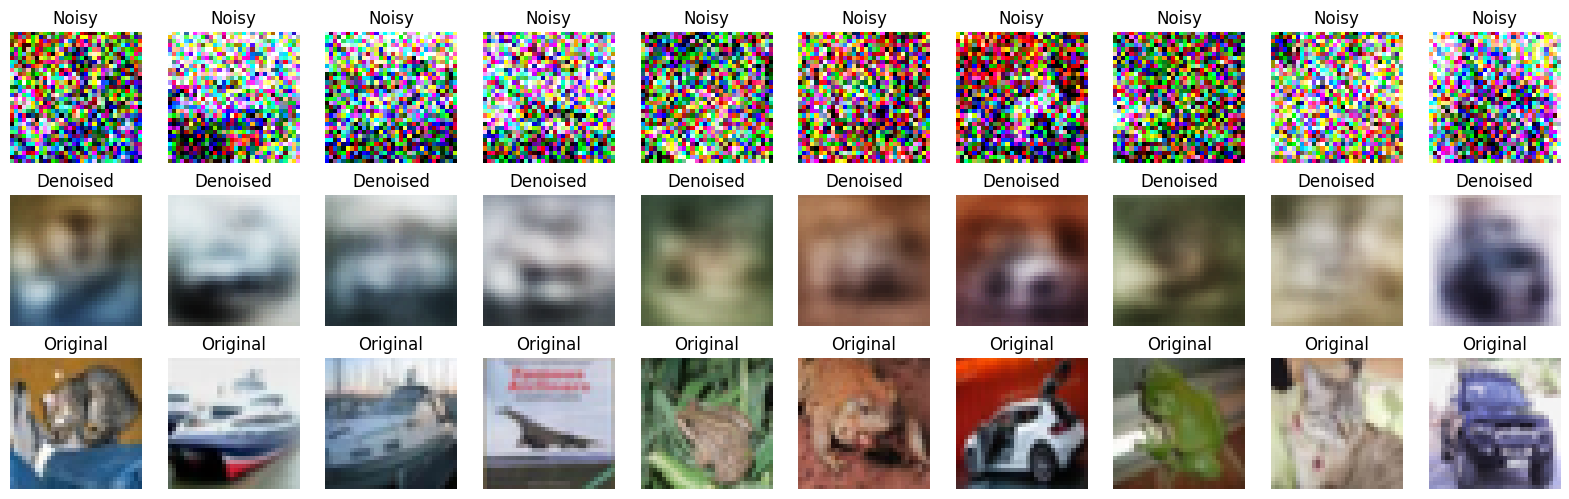

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지에 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)

# 다중 잠재 공간 정의 (여기서는 2개의 잠재 공간을 사용)
latent_1 = Dense(128, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(128, activation='relu', name='latent_space_2')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2])

# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 원본 이미지 (노이즈 추가된)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 (참고용)
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


### latent space 3개의 경우

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# 1. MNIST 데이터셋 로드
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지 크기를 (28, 28)에서 (28, 28, 1)로 확장
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. 이미지에 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 4. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)

# 다중 잠재 공간 정의 (3개의 잠재 공간)
latent_1 = Dense(32, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(32, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(32, activation='relu', name='latent_space_3')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3])

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 5. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 6. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 7. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지 (노이즈 추가된)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 (참고용)
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()


Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.3255 - val_loss: 0.1795
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.1703 - val_loss: 0.1495
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1480 - val_loss: 0.1384
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1370 - val_loss: 0.1319
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1316 - val_loss: 0.1276
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1276 - val_loss: 0.1251
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.1249 - val_loss: 0.1227
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1224 - val_loss: 0.1206
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1204 - val_loss: 0.1190
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1187 - val_loss: 0.1178
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1177 - val_loss: 0.1165
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━

# 총합 결과 (10/14)

**[정량적 평가]**
Auto-encoder와 Developed idea(=Multi Latent Space) img  PSNR 비교값은

* 원본과 Auto-encoder img 비교 ... 17.80 dB
* 원본과 Multi Latent Space(2) 비교 ... 17.80 dB
* 원본과 Multi Latent Space(3) 비교 ... 17.80 dB
<br> 다른 평가 지표를 통해 정량적 평가를 진행할 것이 요구됨

**[정성적 평가]**
원본 이미지가 복잡한 경우(original img 4, 5, 9와 같은 경우)latent space 2개, 3개일 때의 결과가 원본 이미지와 유사하다는 것을 확인 할 수 있었음. <br>추후 이에 대한 결과를 제시할 것이 요구됨

# Multi Latent Space

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 167ms/step - loss: 0.6600 - val_loss: 0.6234
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 170ms/step - loss: 0.6188 - val_loss: 0.6067
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 163ms/step - loss: 0.6066 - val_loss: 0.5989
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - loss: 0.5979 - val_loss: 0.5998
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 169ms/step - loss: 0.5959 - val_loss: 0.5973
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 163ms/step - loss: 0.5928 - val_loss: 0.5923
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - loss: 0.5904 - val_loss: 0.5955
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - loss: 0.5894 - val_loss: 0.5912
Epoch 9/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - loss: 0.5889 - val_loss: 0.5928
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - loss: 0.5881 - val_loss: 0.5888
Epoch 11/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - loss: 0.5867 - val_loss: 0.5878
Epoch 12/30
196/196

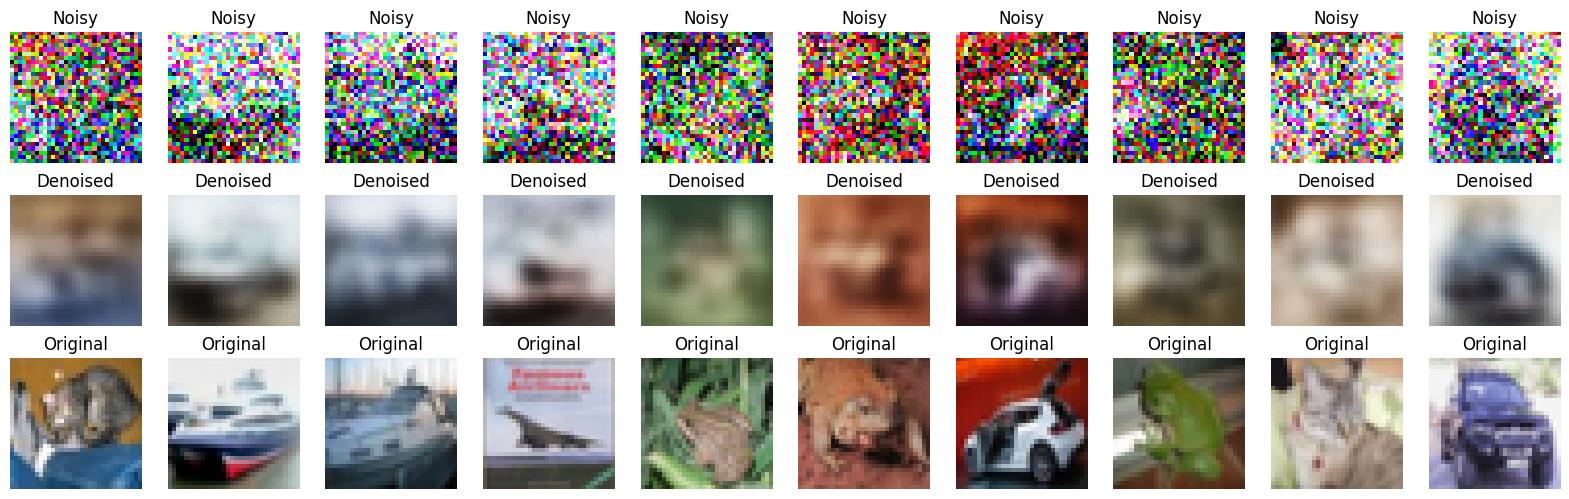

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)

# 다중 잠재 공간 정의 (예: 3개의 잠재 공간 사용)
latent_1 = Dense(128, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(128, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(128, activation='relu', name='latent_space_3')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3])

# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 데이터 재구성 및 재구성 오류 계산
denoised_imgs = autoencoder.predict(x_test_noisy)
reconstruction_error = np.mean(np.square(x_test - denoised_imgs))  # 재구성 오류

print(f'Reconstruction Error (MSE): {reconstruction_error}')

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 노이즈 추가된 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


latent 4

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 159ms/step - loss: 0.6601 - val_loss: 0.6216
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 154ms/step - loss: 0.6182 - val_loss: 0.6076
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - loss: 0.6142 - val_loss: 0.6016
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 162ms/step - loss: 0.6002 - val_loss: 0.5982
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 155ms/step - loss: 0.5963 - val_loss: 0.5975
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - loss: 0.5941 - val_loss: 0.5930
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - loss: 0.5925 - val_loss: 0.5924
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 31s 159ms/step - loss: 0.5914 - val_loss: 0.5949
Epoch 9/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - loss: 0.5899 - val_loss: 0.5900
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - loss: 0.5887 - val_loss: 0.5898
Epoch 11/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - loss: 0.5886 - val_loss: 0.5900
Epoch 12/30
196/196

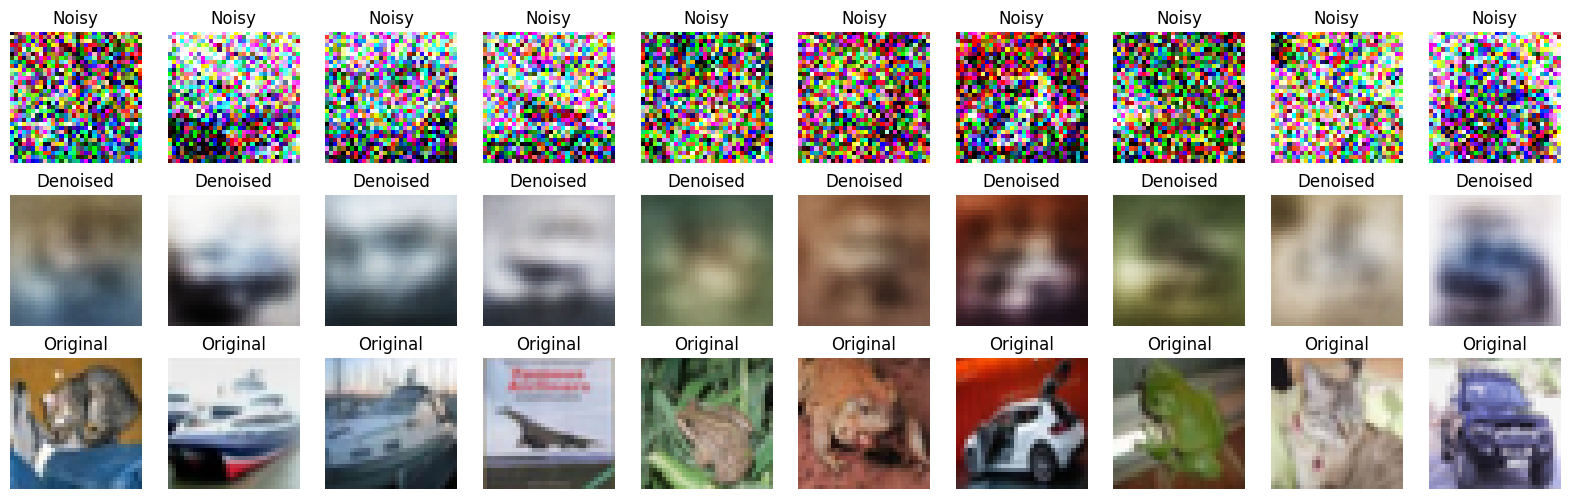

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)

# 다중 잠재 공간 정의 (5개의 잠재 공간 사용)
latent_1 = Dense(128, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(128, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(128, activation='relu', name='latent_space_3')(x)
latent_4 = Dense(128, activation='relu', name='latent_space_4')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3, latent_4])

# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 데이터 재구성 및 재구성 오류 계산
denoised_imgs = autoencoder.predict(x_test_noisy)
reconstruction_error = np.mean(np.square(x_test - denoised_imgs))  # 재구성 오류

print(f'Reconstruction Error (MSE): {reconstruction_error}')

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 노이즈 추가된 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


latent 5

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 233ms/step - loss: 0.6610 - val_loss: 0.6238
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - loss: 0.6195 - val_loss: 0.6146
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - loss: 0.6055 - val_loss: 0.6024
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step - loss: 0.5992 - val_loss: 0.5976
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - loss: 0.5965 - val_loss: 0.5958
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 187ms/step - loss: 0.5925 - val_loss: 0.5950
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 179ms/step - loss: 0.5914 - val_loss: 0.5907
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - loss: 0.5899 - val_loss: 0.5902
Epoch 9/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 176ms/step - loss: 0.5888 - val_loss: 0.5890
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - loss: 0.5883 - val_loss: 0.5906
Epoch 11/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step 

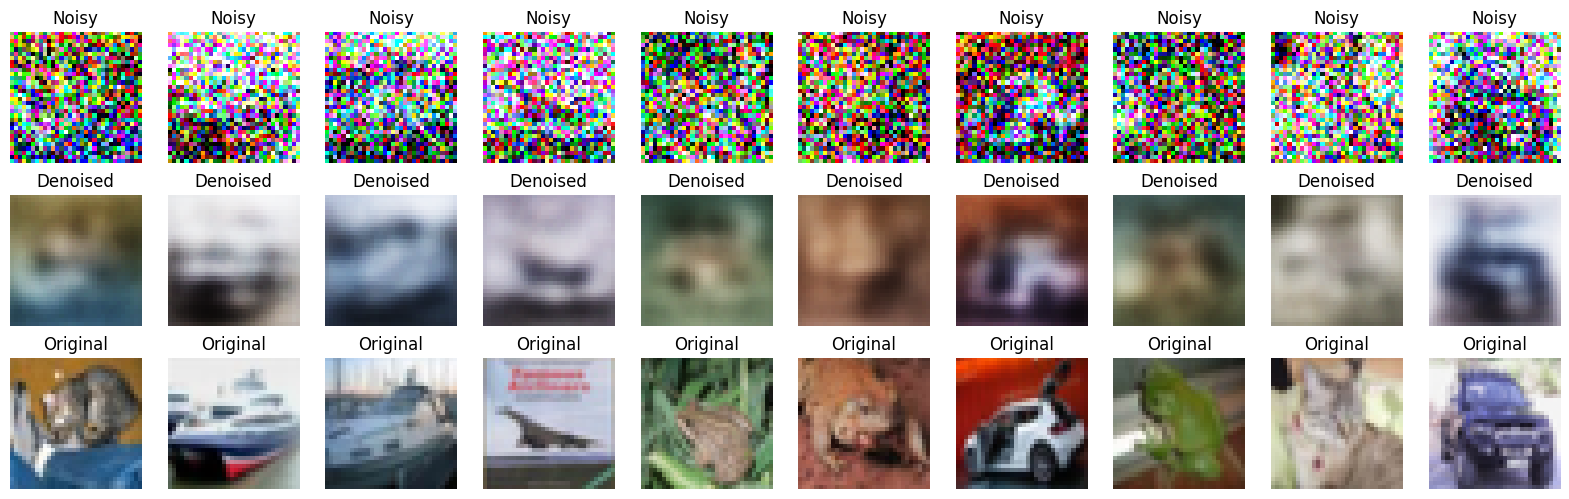

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)

# 다중 잠재 공간 정의 (5개의 잠재 공간 사용)
latent_1 = Dense(128, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(128, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(128, activation='relu', name='latent_space_3')(x)
latent_4 = Dense(128, activation='relu', name='latent_space_4')(x)
latent_5 = Dense(128, activation='relu', name='latent_space_5')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3, latent_4, latent_5])

# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 데이터 재구성 및 재구성 오류 계산
denoised_imgs = autoencoder.predict(x_test_noisy)
reconstruction_error = np.mean(np.square(x_test - denoised_imgs))  # 재구성 오류

print(f'Reconstruction Error (MSE): {reconstruction_error}')

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 노이즈 추가된 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


latent 6

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 171ms/step - loss: 0.6604 - val_loss: 0.6251
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - loss: 0.6181 - val_loss: 0.6079
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 166ms/step - loss: 0.6045 - val_loss: 0.6028
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - loss: 0.5984 - val_loss: 0.5965
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - loss: 0.5946 - val_loss: 0.5948
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - loss: 0.5925 - val_loss: 0.5935
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - loss: 0.5910 - val_loss: 0.5949
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - loss: 0.5895 - val_loss: 0.5944
Epoch 9/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - loss: 0.5897 - val_loss: 0.5894
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - loss: 0.5880 - val_loss: 0.5895
Epoch 11/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - loss: 0.5868 - val_loss: 0.5894
Epoch 12/30
196/196

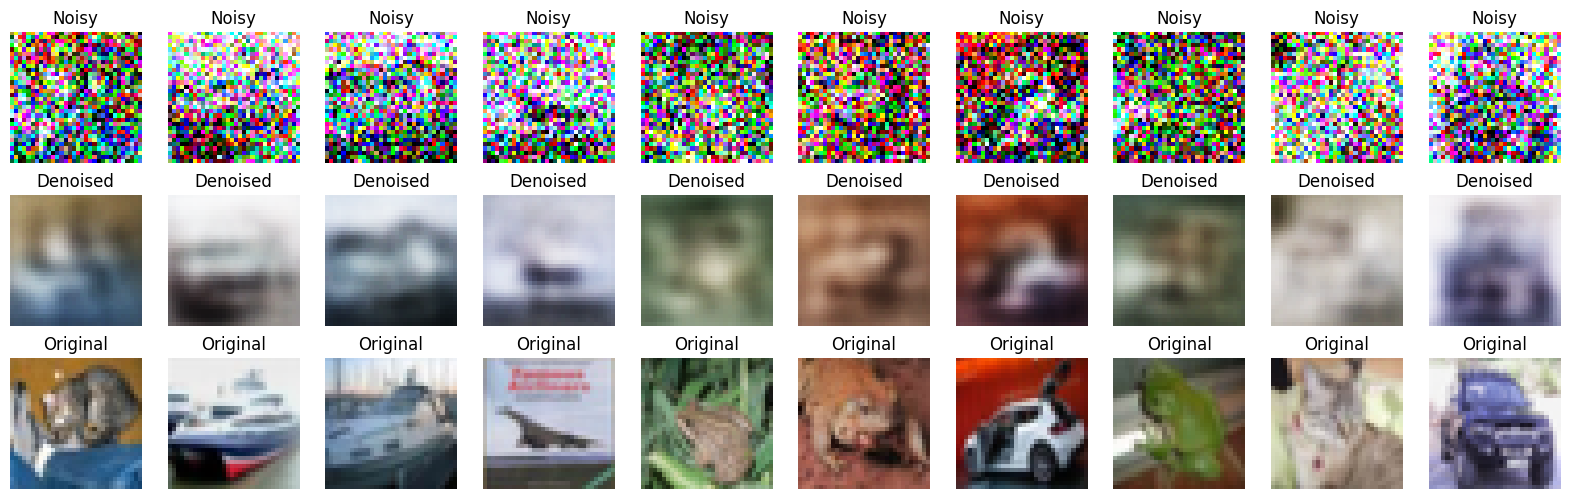

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)

# 다중 잠재 공간 정의 (9개의 잠재 공간 사용)
latent_1 = Dense(128, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(128, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(128, activation='relu', name='latent_space_3')(x)
latent_4 = Dense(128, activation='relu', name='latent_space_4')(x)
latent_5 = Dense(128, activation='relu', name='latent_space_5')(x)
latent_6 = Dense(128, activation='relu', name='latent_space_6')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3, latent_4, latent_5, latent_6])


# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 데이터 재구성 및 재구성 오류 계산
denoised_imgs = autoencoder.predict(x_test_noisy)
reconstruction_error = np.mean(np.square(x_test - denoised_imgs))  # 재구성 오류

print(f'Reconstruction Error (MSE): {reconstruction_error}')

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 노이즈 추가된 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


latent 7

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 180ms/step - loss: 0.6605 - val_loss: 0.6240
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 202ms/step - loss: 0.6189 - val_loss: 0.6161
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - loss: 0.6082 - val_loss: 0.6019
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 176ms/step - loss: 0.6012 - val_loss: 0.5981
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - loss: 0.5978 - val_loss: 0.5968
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - loss: 0.5949 - val_loss: 0.5958
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - loss: 0.5925 - val_loss: 0.5933
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - loss: 0.5922 - val_loss: 0.5971
Epoch 9/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - loss: 0.5911 - val_loss: 0.5910
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - loss: 0.5901 - val_loss: 0.5923
Epoch 11/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step

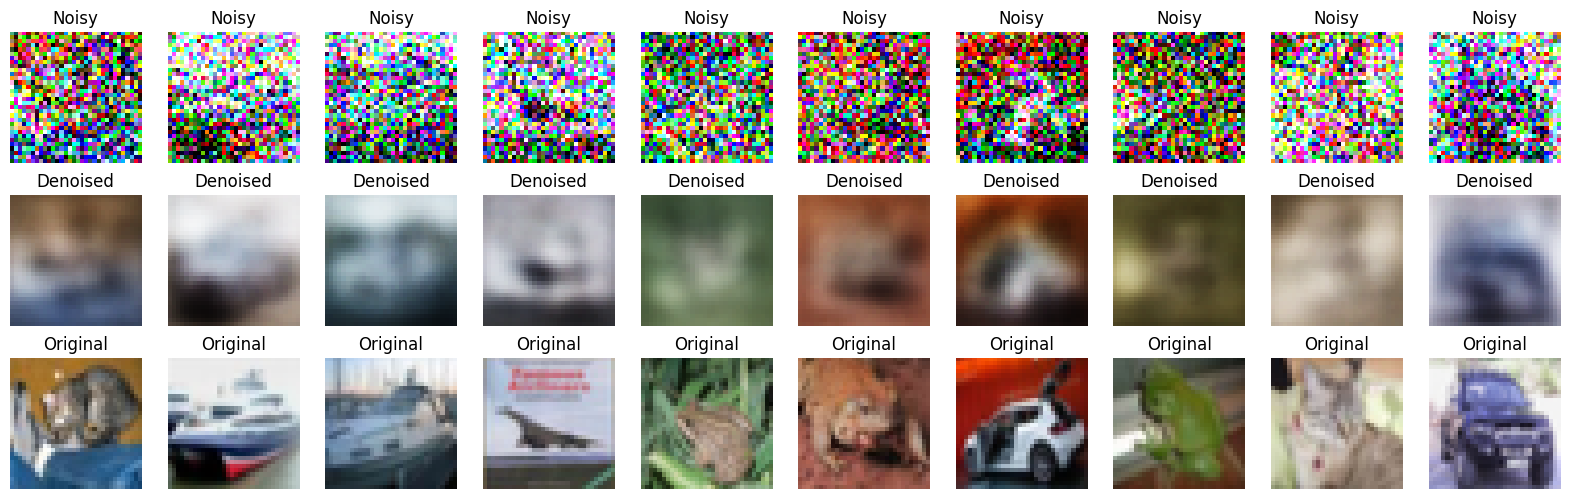

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)

# 다중 잠재 공간 정의 (9개의 잠재 공간 사용)
latent_1 = Dense(128, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(128, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(128, activation='relu', name='latent_space_3')(x)
latent_4 = Dense(128, activation='relu', name='latent_space_4')(x)
latent_5 = Dense(128, activation='relu', name='latent_space_5')(x)
latent_6 = Dense(128, activation='relu', name='latent_space_6')(x)
latent_7 = Dense(128, activation='relu', name='latent_space_7')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3, latent_4, latent_5, latent_6, latent_7])


# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 데이터 재구성 및 재구성 오류 계산
denoised_imgs = autoencoder.predict(x_test_noisy)
reconstruction_error = np.mean(np.square(x_test - denoised_imgs))  # 재구성 오류

print(f'Reconstruction Error (MSE): {reconstruction_error}')

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 노이즈 추가된 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


latent 9

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 46s 220ms/step - loss: 0.6632 - val_loss: 0.6259
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 209ms/step - loss: 0.6196 - val_loss: 0.6066
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - loss: 0.6079 - val_loss: 0.6020
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - loss: 0.6014 - val_loss: 0.6004
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - loss: 0.5980 - val_loss: 0.6027
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - loss: 0.5961 - val_loss: 0.5948
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 193ms/step - loss: 0.5938 - val_loss: 0.5944
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 204ms/step - loss: 0.5930 - val_loss: 0.5923
Epoch 9/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 200ms/step - loss: 0.5909 - val_loss: 0.6025
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - loss: 0.5939 - val_loss: 0.5948
Epoch 11/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - loss: 0.5890 - val_loss: 0.5900
Epoch 12/30
196/196

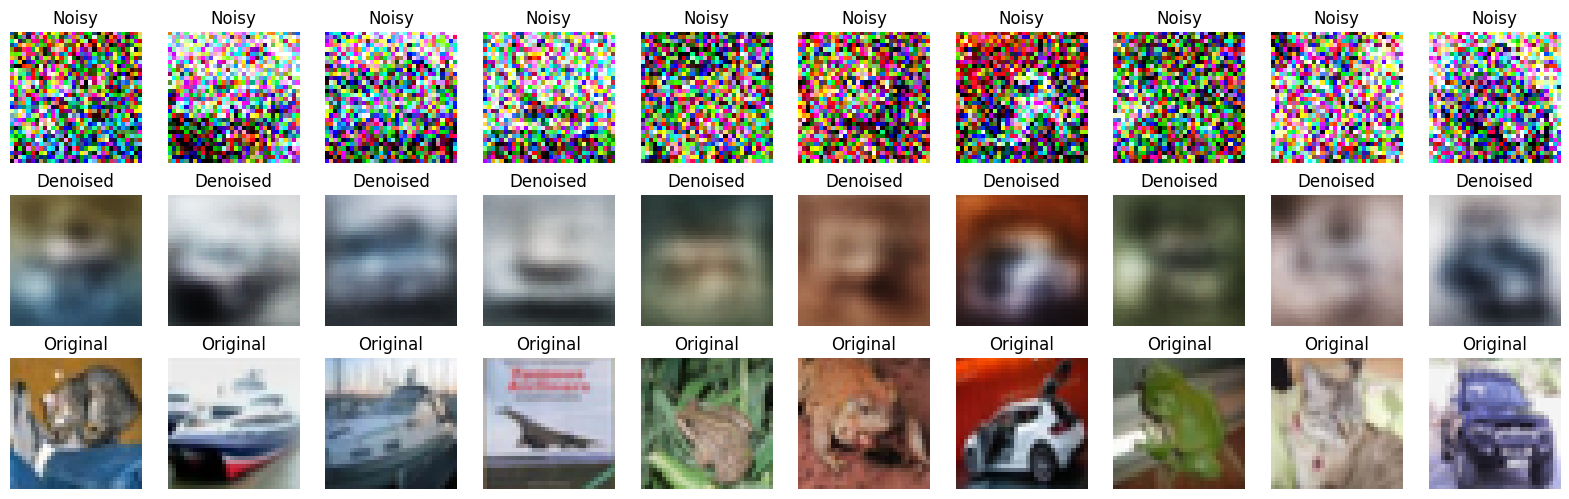

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)

# 다중 잠재 공간 정의 (9개의 잠재 공간 사용)
latent_1 = Dense(128, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(128, activation='relu', name='latent_space_2')(x)
latent_3 = Dense(128, activation='relu', name='latent_space_3')(x)
latent_4 = Dense(128, activation='relu', name='latent_space_4')(x)
latent_5 = Dense(128, activation='relu', name='latent_space_5')(x)
latent_6 = Dense(128, activation='relu', name='latent_space_6')(x)
latent_7 = Dense(128, activation='relu', name='latent_space_7')(x)
latent_8 = Dense(128, activation='relu', name='latent_space_8')(x)
latent_9 = Dense(128, activation='relu', name='latent_space_9')(x)

# 다중 잠재 공간을 결합
encoded = Concatenate()([latent_1, latent_2, latent_3, latent_4, latent_5, latent_6, latent_7, latent_8, latent_9])


# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 데이터 재구성 및 재구성 오류 계산
denoised_imgs = autoencoder.predict(x_test_noisy)
reconstruction_error = np.mean(np.square(x_test - denoised_imgs))  # 재구성 오류

print(f'Reconstruction Error (MSE): {reconstruction_error}')

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 노이즈 추가된 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


# 비교용 지표

loss 값 비교

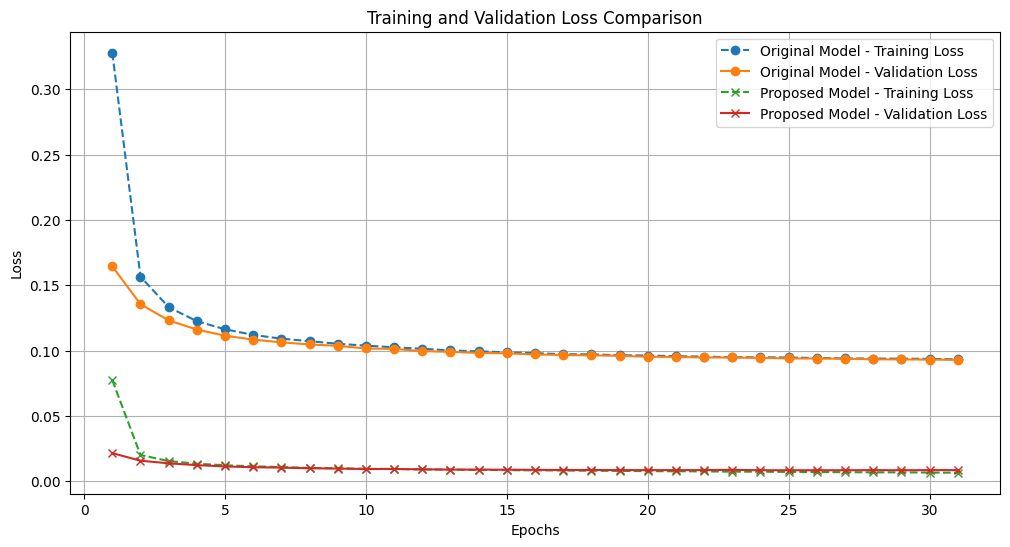

In [ ]:
import matplotlib.pyplot as plt

# 기존 모델의 Train Loss와 Validation Loss
original_train_loss = [
    0.3280, 0.1566, 0.1332, 0.1225, 0.1163, 0.1120, 0.1091, 0.1072, 0.1052, 0.1038,
    0.1025, 0.1014, 0.1001, 0.0994, 0.0987, 0.0980, 0.0972, 0.0971, 0.0964, 0.0962,
    0.0957, 0.0954, 0.0949, 0.0949, 0.0947, 0.0943, 0.0940, 0.0939, 0.0938, 0.0937, 0.0933
]
original_val_loss = [
    0.1645, 0.1355, 0.1231, 0.1161, 0.1114, 0.1084, 0.1063, 0.1047, 0.1036, 0.1016,
    0.1013, 0.0996, 0.0990, 0.0982, 0.0979, 0.0970, 0.0966, 0.0963, 0.0960, 0.0953,
    0.0951, 0.0947, 0.0947, 0.0944, 0.0940, 0.0939, 0.0938, 0.0933, 0.0932, 0.0931, 0.0929
]

# 제안된 모델의 Train Loss와 Validation Loss
proposed_train_loss = [
    0.0774, 0.0201, 0.0154, 0.0134, 0.0122, 0.0114, 0.0108, 0.0102, 0.0099, 0.0095,
    0.0093, 0.0090, 0.0089, 0.0086, 0.0085, 0.0083, 0.0082, 0.0080, 0.0079, 0.0077,
    0.0076, 0.0075, 0.0073, 0.0073, 0.0071, 0.0070, 0.0069, 0.0068, 0.0068, 0.0066, 0.0065
]
proposed_val_loss = [
    0.0215, 0.0157, 0.0137, 0.0123, 0.0113, 0.0107, 0.0104, 0.0099, 0.0097, 0.0093,
    0.0094, 0.0091, 0.0089, 0.0089, 0.0088, 0.0087, 0.0086, 0.0086, 0.0085, 0.0085,
    0.0085, 0.0085, 0.0087, 0.0084, 0.0084, 0.0084, 0.0084, 0.0085, 0.0084, 0.0085, 0.0085
]

# 에포크 범위
epochs_original = range(1, len(original_train_loss) + 1)
epochs_proposed = range(1, len(proposed_train_loss) + 1)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 기존 모델 Loss
plt.plot(epochs_original, original_train_loss, label="Original Model - Training Loss", marker='o', linestyle='--')
plt.plot(epochs_original, original_val_loss, label="Original Model - Validation Loss", marker='o', linestyle='-')

# 제안된 모델 Loss
plt.plot(epochs_proposed, proposed_train_loss, label="our Model - Training Loss", marker='x', linestyle='--')
plt.plot(epochs_proposed, proposed_val_loss, label="our Model - Validation Loss", marker='x', linestyle='-')

# 그래프 설정
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


# project code

### 졸프 코드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

# 1. MNIST 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 2. 노이즈 추가
noise_factor = 0.3
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(size=x_test.shape), 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(28, 28, 1))

# 인코더
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# 다중 잠재 공간 정의
latent_1 = Dense(32, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(32, activation='relu', name='latent_space_2')(x)
encoded = Concatenate()([latent_1, latent_2])

# 디코더
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 4. 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[early_stopping])

# 5. 결과 시각화
denoised_imgs = autoencoder.predict(x_test_noisy)
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


### project cifar

원본

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.6564 - val_loss: 0.6160
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6088 - val_loss: 0.5995
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5945 - val_loss: 0.5903
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5901 - val_loss: 0.5875
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5862 - val_loss: 0.5865
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5849 - val_loss: 0.5840
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5828 - val_loss: 0.5831
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5821 - val_loss: 0.5822
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5824 - val_loss: 0.5826
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5811 - val_loss: 0.5811
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


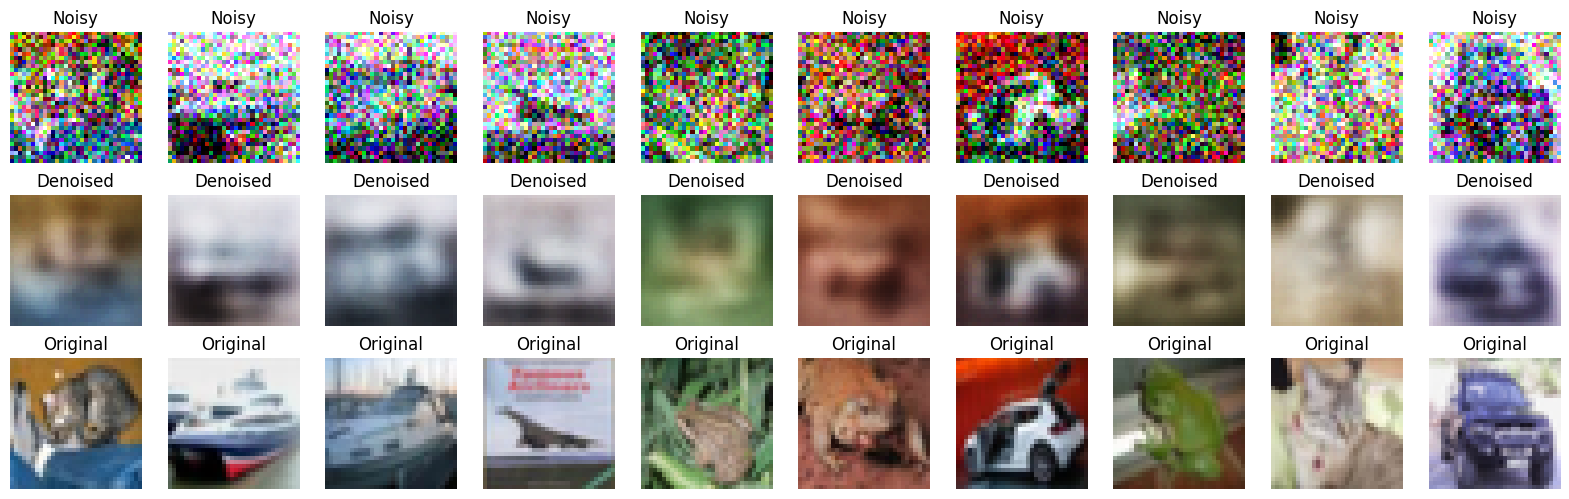

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# 1. CIFAR-10 데이터셋 로드
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 이미지에 노이즈 추가
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 값이 0~1 범위를 벗어나지 않도록 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)
encoded = Dense(256, activation='relu')(x)

# 디코더
x = Dense(512, activation='relu')(encoded)
x = Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. 모델 학습
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. 테스트 이미지에 대해 노이즈 제거
denoised_imgs = autoencoder.predict(x_test_noisy)

# 6. 결과 시각화
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 원본 이미지 (노이즈 추가된)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 이미지 (참고용)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 32)     │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 16, 16, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 8, 8, 64)       │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 4096)           │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 256)            │      1,048,832 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ latent_space_1 (Dense)    │ (None, 64)             │         16,448 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ latent_space_2 (Dense)    │ (None, 64)             │         16,448 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128)            │              0 │ latent_space_1[0][0],  │
│                           │                        │                │ latent_space_2[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 256)            │         33,024 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 4096)           │      1,052,672 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 8, 8, 64)       │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 64)     │         36,928 │ reshape_1[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 32, 32, 32)     │         18,464 │ conv2d_transpose[0][0] │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_2        │ (None, 32, 32, 3)      │            867 │ conv2d_transpose_1[0]… │
│ (Conv2DTranspose)         │                        │                │                        │
└──────────────────────

 Total params: 2,243,075 (8.56 MB)

 Trainable params: 2,243,075 (8.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.0515 - val_loss: 0.0241
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0227 - val_loss: 0.0176
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0171 - val_loss: 0.0161
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0144 - val_loss: 0.0136
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0135 - val_loss: 0.0131
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0129 - val_loss: 0.0132
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 10/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 11/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0115 - val_loss: 0.0115
Epoch 12/100
196/196 ━━━━━━━

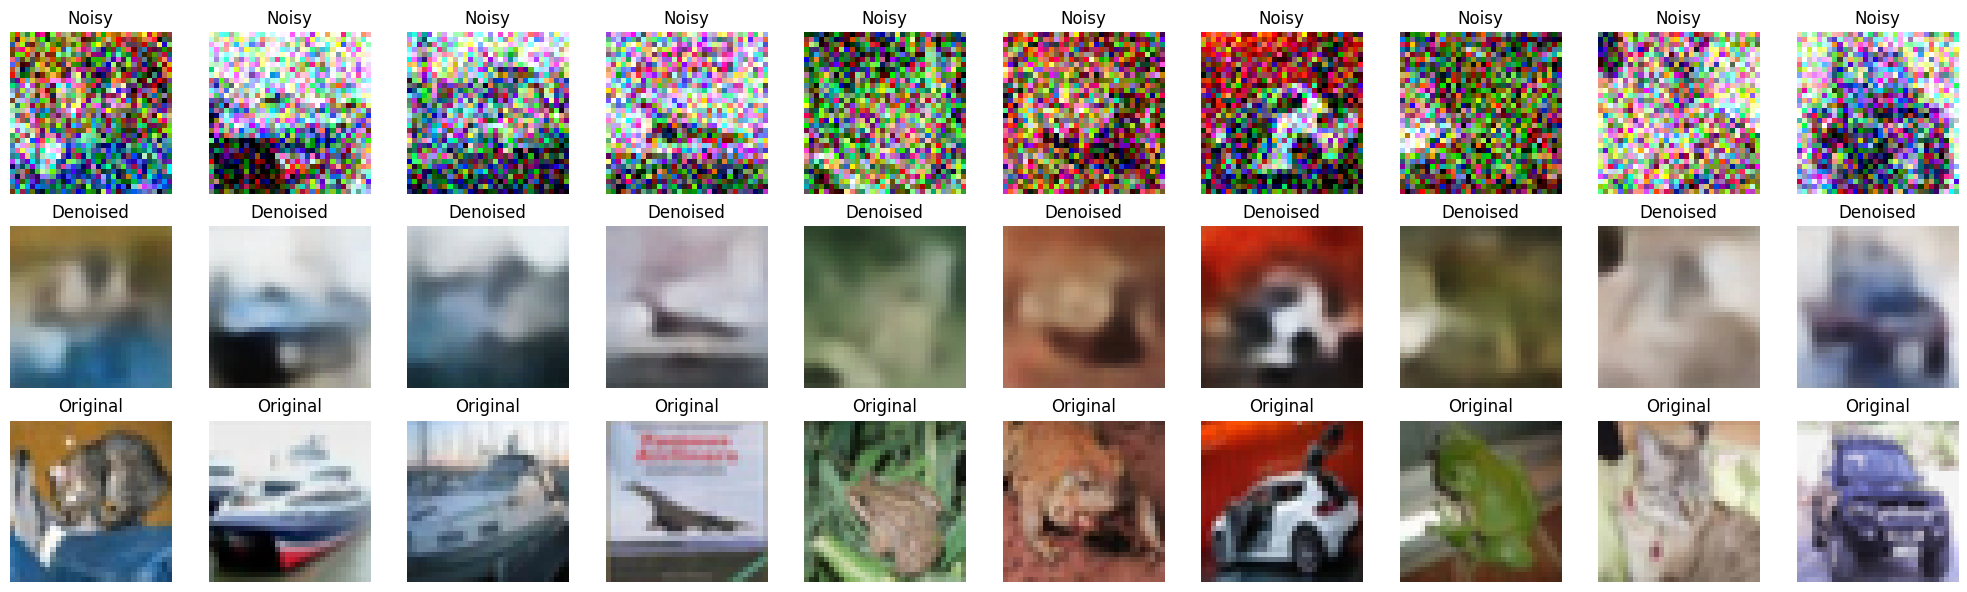

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Concatenate, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping

# 1. CIFAR-10 데이터셋 로드 및 전처리
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. 노이즈 추가
noise_factor = 0.3
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(size=x_test.shape), 0., 1.)

# 3. 다중 잠재 공간을 갖는 오토인코더 모델 정의
input_img = Input(shape=(32, 32, 3))

# 인코더
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)  # 16x16x32
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)  # 8x8x64
x = Flatten()(x)
x = Dense(256, activation='relu')(x)

# 다중 잠재 공간 정의
latent_1 = Dense(64, activation='relu', name='latent_space_1')(x)
latent_2 = Dense(64, activation='relu', name='latent_space_2')(x)
encoded = Concatenate()([latent_1, latent_2])  # Latent vector size: 128

# 디코더
x = Dense(256, activation='relu')(encoded)
x = Dense(8 * 8 * 64, activation='relu')(x)
x = Reshape((8, 8, 64))(x)
x = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)  # 16x16x64
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)  # 32x32x32
decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)  # 32x32x3

# 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 모델 요약 출력 (optional)
autoencoder.summary()

# 4. 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test),
                          callbacks=[early_stopping])

# 5. 결과 시각화
denoised_imgs = autoencoder.predict(x_test_noisy)
n = 10  # 볼 이미지 개수
plt.figure(figsize=(20, 6))
for i in range(n):
    # 원본 노이즈 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

    # 원본 깨끗한 이미지
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')
plt.tight_layout()
plt.show()
